# Import all Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading and Loading Data

In [3]:
train = pd.read_csv(r"C:\Users\Ankit Solanki\Documents\ML project2\Loan Prediction\train.csv")
test = pd.read_csv(r"C:\Users\Ankit Solanki\Documents\ML project2\Loan Prediction\test.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


We can remove Loan_ID column as it will no affect accuracy of model. so we split data into train_x,train_y

In [6]:
train_x = train.iloc[:,1:12]
test_x = test.iloc[:,1:12]
train_y = train.iloc[:,12]

In [7]:
train_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [8]:
train_x.shape

(614, 11)

In [9]:
test_x.shape

(367, 11)

In [10]:
train_x['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
train_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [12]:
test_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# EDA

<AxesSubplot:>

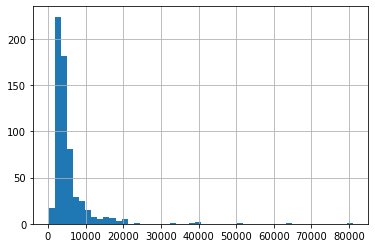

In [13]:
train_x['ApplicantIncome'].hist(bins=50)

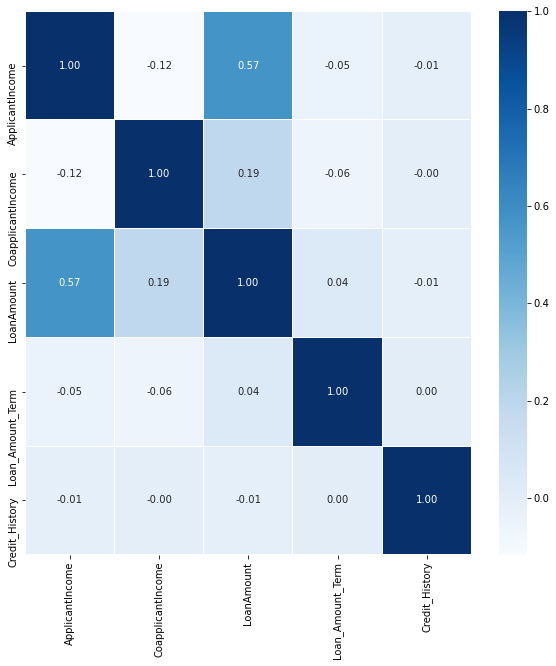

In [14]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_x.corr(),ax=ax,annot= True,linewidth= 0.02,fmt='.2f',cmap = 'Blues')
plt.show()

<AxesSubplot:>

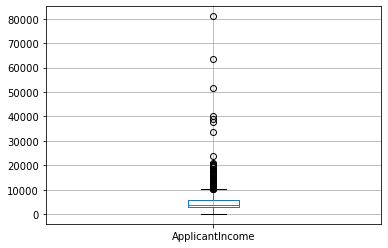

In [15]:
train_x.boxplot(column='ApplicantIncome')

<AxesSubplot:>

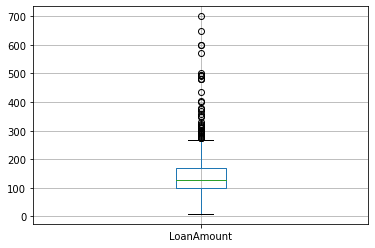

In [16]:
train_x.boxplot(column='LoanAmount')

In [17]:
train_x.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

Number of attributes having missing values 7


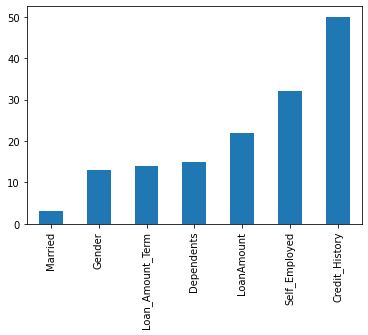

In [18]:
missing = train_x.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
print("Number of attributes having missing values " + str(len(missing)))

# Data Processing on Training Data

In [19]:
train_x.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [20]:
test_x.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [21]:
train_x['Married'] = train_x['Married'].fillna(train_x['Married'].mode()[0])
train_x['Dependents'] =  train_x['Dependents'].fillna( train_x['Dependents'].mode()[0])
train_x['Self_Employed'] =  train_x['Self_Employed'].fillna( train_x['Self_Employed'].mode()[0])
train_x['Self_Employed'] =  train_x['Self_Employed'].fillna( train_x['Self_Employed'].mode()[0])
train_x['LoanAmount'] =  train_x['LoanAmount'].fillna( train_x['LoanAmount'].mean())
train_x['Loan_Amount_Term'] =  train_x['Loan_Amount_Term'].fillna( train_x['Loan_Amount_Term'].mode()[0])
train_x['Credit_History'] =  train_x['Credit_History'].fillna( train_x['Credit_History'].mode()[0])
train_x['Gender'] = train_x['Gender'].fillna(train_x['Gender'].mode()[0])

Replacing different dtypes value to integer

In [22]:
train_x['Dependents'] =  train_x['Dependents'].replace(to_replace="3+",value=3) 
train_x['Dependents'] =  train_x['Dependents'].replace(to_replace="2",value=2)  
train_x['Dependents'] =  train_x['Dependents'].replace(to_replace="1",value=1)  
train_x['Dependents'] =  train_x['Dependents'].replace(to_replace="0",value=0) 

In [23]:
train_x['Gender'] =  train_x['Gender'].replace(to_replace="Male",value=1)
train_x['Gender'] =  train_x['Gender'].replace(to_replace="Female",value=0)

# Label encoding of train data set

In [24]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [25]:
train_x['Married'] = label.fit_transform(train_x['Married'])
train_x['Education'] = label.fit_transform(train_x['Education'])
train_x['Self_Employed'] = label.fit_transform(train_x['Self_Employed'])
train_x['Property_Area'] = label.fit_transform(train_x['Property_Area'])

In [26]:
train_x = pd.get_dummies(train_x ,columns=['Married','Education','Self_Employed','Property_Area'])


In [27]:
train_y = train_y.replace(to_replace="Y",value=1)
train_y = train_y.replace(to_replace="N",value=0)

# Data Processing on Test Data

In [28]:
test_x['Married'] = test_x['Married'].fillna(test_x['Married'].mode()[0])
test_x['Dependents'] =  test_x['Dependents'].fillna( test_x['Dependents'].mode()[0])
test_x['Self_Employed'] =  test_x['Self_Employed'].fillna( test_x['Self_Employed'].mode()[0])
test_x['Self_Employed'] =  test_x['Self_Employed'].fillna( test_x['Self_Employed'].mode()[0])
test_x['LoanAmount'] =  test_x['LoanAmount'].fillna( test_x['LoanAmount'].mean())
test_x['Loan_Amount_Term'] =  test_x['Loan_Amount_Term'].fillna( test_x['Loan_Amount_Term'].mode()[0])
test_x['Credit_History'] =  test_x['Credit_History'].fillna( test_x['Credit_History'].mode()[0])
test_x['Gender'] = test_x['Gender'].fillna(test_x['Gender'].mode()[0])

Replacing different dtypes value to integer

In [29]:
test_x['Dependents'] =  test_x['Dependents'].replace(to_replace="3+",value=3) 
test_x['Dependents'] =  test_x['Dependents'].replace(to_replace="2",value=2)  
test_x['Dependents'] =  test_x['Dependents'].replace(to_replace="1",value=1)  
test_x['Dependents'] =  test_x['Dependents'].replace(to_replace="0",value=0)

In [30]:
test_x['Gender'] =  test_x['Gender'].replace(to_replace="Male",value=1)
test_x['Gender'] =  test_x['Gender'].replace(to_replace="Female",value=0)

In [31]:
train_x

,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_0,Married_1,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Property_Area_0,Property_Area_1,Property_Area_2
0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,1,0,0,0,1
1,1,1,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,1,0,1,0,0
2,1,0,3000,0.0,66.000000,360.0,1.0,0,1,1,0,0,1,0,0,1
3,1,0,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,1
4,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,1,0,0
610,1,3,4106,0.0,40.000000,180.0,1.0,0,1,1,0,1,0,1,0,0
611,1,1,8072,240.0,253.000000,360.0,1.0,0,1,1,0,1,0,0,0,1
612,1,2,7583,0.0,187.000000,360.0,1.0,0,1,1,0,1,0,0,0,1


# Label encoding of test dataset

In [32]:
label = preprocessing.LabelEncoder()

In [33]:
test_x['Married'] = label.fit_transform(test_x['Married'])
test_x['Education'] = label.fit_transform(test_x['Education'])
test_x['Self_Employed'] = label.fit_transform(test_x['Self_Employed'])
test_x['Property_Area'] = label.fit_transform(test_x['Property_Area'])

test_x = pd.get_dummies(test_x ,columns=['Married','Education','Self_Employed','Property_Area'])

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

# Logistic Regression

In [35]:
classifier = LogisticRegression(max_iter=200)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

In [36]:
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.8324324324324325


In [37]:
test_y = classifier.predict(test_x)

In [38]:
test_y.shape

(367,)

In [39]:
submission = pd.DataFrame(test_y)
submission = submission.replace(to_replace=1,value="Y")
submission = submission.replace(to_replace=0,value="N")
submission.insert(loc=0,column='Loan_ID',value=test['Loan_ID'])
submission.to_csv('submission1.csv')

In [40]:
submission

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# Random Forest

In [41]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.8
